In [58]:
# Analiza danych Abalone Data Set
import warnings
warnings.filterwarnings('ignore')


Wykonał Kacper Durmaj 215712

Zestaw danych został pobrany z UCI Machine Learning Repository

Przewidywanie wieku abalone na podstawie pomiarów fizycznych. Wiek abalone określa się poprzez przecięcie muszli przez stożek, wybarwienie go, i liczenie liczby pierścieni pod mikroskopem — nudne i czasochłonne zadanie. Inne pomiary, które są łatwiejsze do uzyskania, również mogą służyć do przewidywania wieku. 

Atrybuty <br>
0   Sex<br>
1   Length<br>
2   Diameter<br>
3   Height<br>
4   Whole weight<br>
5   Shucked weight<br>
6   Viscera weight<br>
7   Shell weight<br>
8   Rings<br>

Wybór odpowiednich cech</br>
Atrybutami wyjściowymi jest ilość kręgów, natomiast wartościami wejściowymi wszystkie atrybuty z wyjątkiem płci.
</br></br>
Rings - podlega predykcji</br>
Sex - parametr zostaje usunięty ponieważ płeć nie jest pomiarem czysto fizycznym</br>
Reszta atrybutów zostanie użyta jako parametry wejściowe</br>

Cel</br>
W tej analizie rozwiąże problem przewidywania wieku Abalone przy pomocy regresii. Wiek odpowiada ilości kręgów na skorupie, ilość kręgów będzie przewidywana dzięki innym pomiarom dostepnych w bazie.</br> Użyję do tego metody drzewa decyzyjnego (eng. DecisionTree method).</br> 


In [40]:
# Import niezbędnych bibliotek wykorzystanych do obróbki danych
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# Import danych
data = pd.read_csv('abalone.data', header=None)

In [42]:
# Sprawdzenie pierwszych 5 rekordóww celu sprawdzenia czy dane zostały zaimportowane 
data.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [43]:
# Dodanie nazw kolumn które zostały wzięte z pliku abalone.names
data.columns = [
"Sex",
"Length",
"Diameter",
"Height",
"Whole weight",
"Shucked weight",
"Viscera weight",
"Shell weight",
"Rings",
]

In [44]:
# Sprawdzanie czy nazwy dodały się poprawnie
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [45]:
# Statystyki opisowe zbioru Abalone
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


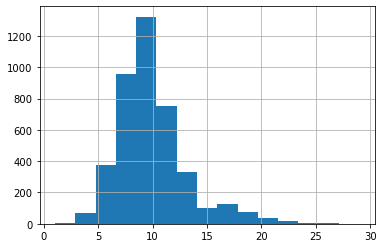

In [46]:
# Przedstawienie na wykresie zakresu wieku jaki mogą osiągnąć ślimaki
# Wiek jest określany na podstawie ilośći kręgów, którą ślimaki mają na swoich skorupach
# Najwięcej ślimaków w tym zestawie danych mają od 5 do 15 kręgów, lecz maksymalna ilość nie przekracza 25
import matplotlib.pyplot as plt
data["Rings"].hist(bins=15)
plt.show()


In [47]:
# Usunięcie kolumny sex
new_data = data.drop("Sex", axis=1)

In [48]:
# Przygotowywanie danych do regresjii
# Dane zostały podzielone podzielone na testowe oraz treningowe w proporcajch 30% do 70%
# Dane treningowe posłużą do uczenai modelu, natomiast dane testowe do sprawdzenia dokładności przewydywań. 

# Biblioteki sklearn oraz funkcja train_test_spli służąca do podzialu danych
from sklearn.model_selection import train_test_split 

# Usunięcie kolumn Rings oraz przypisanie reszty danych do zmiennej features ktora posłóży jako zbiór wejściowy
features = new_data.drop(['Rings'], axis=1) 

# Przypisanie wartości kolumny Rings do zmiennej target, która posłóży jako zbiór wyjściowy
target = new_data['Rings']

# Podział danych na treningowe i testowe
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=69)

In [49]:
# Biblioteka jest odpowiedzialna za metodę DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
 
# Stworzenie modelu DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=5)

# Trenowanie modelu
train = tree.fit(x_train, y_train)

# Przewidywanie wyniku dla zestawu testującego
y_prediction = tree.predict(x_test)

# Ocena jakości wtrenowanego modelu
print('Wynik modelu:')
print('Zestaw testowy: %f' % train.score(x_test, y_test))
print('Zestaw treningowy: %f' % train.score(x_train, y_train))

Wynik modelu:
Zestaw testowy: 0.446621
Zestaw treningowy: 0.544293


In [50]:
# Porównanie przykąłdowych wyników przewidywać i wyników zbioru testowego
test_list = y_test[0:10].tolist()
pred_list = tree.predict(x_test[0:10]).tolist()

list = np.vstack((pred_list, test_list))
print("{:<15s}{:>4s}".format("Przewidywania","Prawdziwe"))
for x, y in zip(*list):
    print("{:<15f}{:>4f}".format(x,y))

Przewidywania  Prawdziwe
10.619427      8.000000
7.802120       8.000000
9.069565       8.000000
11.346939      10.000000
6.535354       6.000000
10.177885      14.000000
5.638554       5.000000
11.284404      11.000000
5.638554       6.000000
6.535354       5.000000


In [51]:
# Metric z biblioteki sklearn oraz sqrt z math posłużą do wyliczenia błędu
from sklearn import metrics
from math import sqrt


# Wyliczenie średniej kwadratowej błędów (Root-mean-square deviation RMSD)
print("Średni błąd: ", round(sqrt(metrics.mean_squared_error(y_test, y_prediction)), 5))

Średni błąd:  2.40203


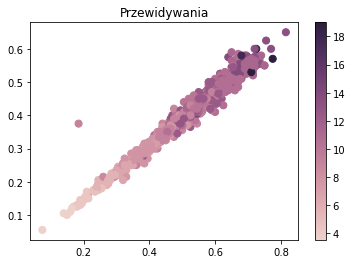

In [52]:
# Wykorzystanie wykresów punktowych do sprawdzenia poprawności przewidywań
# Na wykresie zostały wykorzystane wartości Length i Diameter odpowiadające za długość i średnice Abalone

# Wykres dla wartości przewidywanych
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    x_test.values[:, 0], x_test.values[:, 1], c=y_prediction, s=50, cmap=cmap
)
f.colorbar(points)
plt.title('Przewidywania')
plt.show()

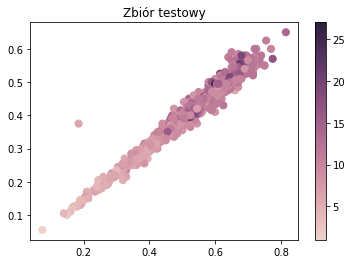

In [53]:
# Wykres dla wartości znanych z zbioru testowego 
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    x_test.values[:, 0], x_test.values[:, 1], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.title('Zbiór testowy')
plt.show()

In [54]:
# Szukanie korelacji w celu polepszenia wyniku
correlation_matrix = new_data.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

Głębokość  5


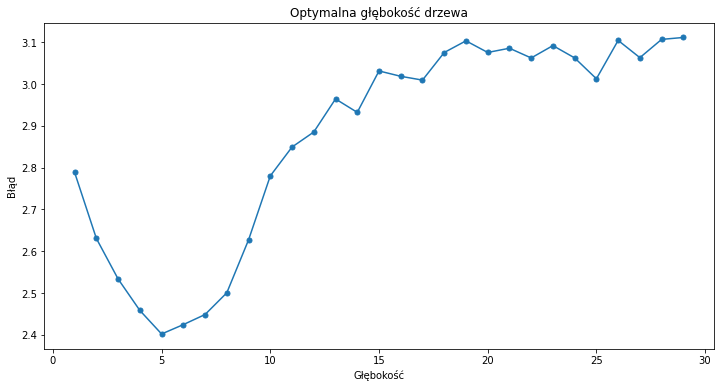

In [55]:
# Szukanie optymalnego głębokości drzewa w celu osiągnięcia najlepszych wyników
# W tym celu podstawiane są wartości od 1 do 30 pod wartość max_depth oznaczającą maksymalną głębokość drzewa.
# Wyliczany jest RMSD w celu określenia jakości, im mniejszy błąd tym lepszy wynik
error = []
for i in range(1, 30):
    tree = DecisionTreeRegressor(max_depth=i)
    train = tree.fit(x_train, y_train)
    y_pred_i = tree.predict(x_test)
    error.append(round(sqrt(metrics.mean_squared_error(y_test, y_pred_i)), 5))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, marker='o', markersize=5)
plt.title('Optymalna głębokość drzewa')
plt.xlabel('Głębokość')
plt.ylabel('Błąd')

print("Głębokość ", np.argmin(error) + 1)

In [56]:
# Krzywa uczenia obrazująca dopasowanie modelu treningowego 
data_percentage_array = np.linspace(10, 100, 10)
train_error = []
test_error = []
for data_percentage in data_percentage_array:
    model = DecisionTreeRegressor(max_depth=5)
    number_of_samples = int(data_percentage / 100. * len(y_train))
    model.fit(x_train.values[:number_of_samples,:], y_train.values[:number_of_samples])

    predicted_train_y = model.predict(x_train)
    predicted_test_y = model.predict(x_test)

    train_error.append((predicted_train_y - y_train).std())
    test_error.append((predicted_test_y - y_test).std())


Text(0, 0.5, 'Błąd')

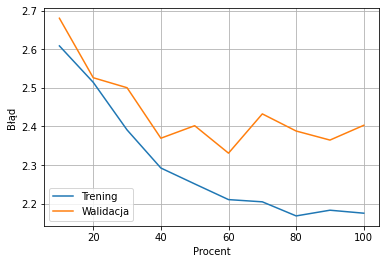

In [57]:
# Rysowanie wykresu krzywej uczenia
plt.plot(data_percentage_array, train_error, label='Trening')
plt.plot(data_percentage_array, test_error, label='Walidacja')
plt.grid()
plt.legend(loc=3)
plt.xlabel('Procent')
plt.ylabel('Błąd')


Wnioski</br> 
Metoda drzew decyzyjnych jest powszechnie stosowaną metodą eksploracji danych używana między innymi do opracowywania algorytmów predykcyjnych dla zmiennej docelowej. Jest to nieparametryczny algorytm, który dzieli populację na podobne do gałęzi segmenty, które tworzą odwrócone drzewo z węzłem głównym, węzłami wewnętrznymi i węzłami liści. 
Na początku swoim modelu otrzymałem wynik na poziomie 7%, co było spowodowane brakiem zadeklarowanej początkowej wartości głębokości drzewa w modelu. Po ustawieniu tej wartości na 10 otrzymałem wynik na poziomie 26% co było znaczną poprawą, lecz nadal dość kiepskim wynikiem. W celu dalszego zwiekszenia poprawności wyszukałem korelacji między atrybutami, lecz w moim zestawie danych żaden atrybut nie posiadał korelacji przekraczającej chociaż 70%, zatem nie usuwałem żadnych atrybutów. Następnie skupiłem się na parametrze głębokości drzewa, który w poprzednim przypadku zwiekszył poprawność modelu o 19%. Przetestowałem model zmieniając parametr max_depth w zakresie od 1 do 30, za miarodajność testu wykorzystałem wartość średniego kwadratu błędu (RMSD). Najlepsze wyniki otrzymałem dla max_depth = 5, gdzie RMSD osiągnęło wynik 2.4, co można interpretować, że mój model przewidując wiek może pomylić się o 2.4 lata. Poprawność modelu osiągnęła zaskakujące 44%. Do sprawdzenia miarodajnośći przewidywań wykorzystałem również wykresy punktowe, widnieją na nich zależność długości oraz średnicy Abalona do ich wieku, im wiekszy Abalon tym starszy osobnik i posiada więcej kręgów, im młodszy tym mniejszy. Wykresy dla wartości przewidywanych oraz wiadomych są do siebie bardzo podobne co może świadczyć o dość dobrej trafności przewidywać pomimo poprawności modelu w wysokości 44%. Z czego można wywnioskować, że w przypadku regresii procentowy wynik wytrenowania modelu nie jest aż tak istotny. Wykonałem również wykres krzywej uczącej na którym widać, że wraz z uczeniem się model osiągał coraz mniejszy błąd, można również zauważyć dość sporą przerwę między liniami w okolicy 40%, która dalej tylko się powieksza, może to świadczyć o gorszym dopasowaniu modelu. 